# Markov Models in Pharmacometric Analyses: A Gentle Technical Guide for Early-Career Researchers

  
**Notebook Purpose:**  
This notebook demonstrates how to simulate and visualize disease state transitions using a Continuous-Time Markov Model (CTMM).  
It accompanies the blog *“Understanding Markov Models in Pharmacometric Analyses: A Gentle Technical Guide for Early-Career Researchers”*.

**Objectives**
1. Understand the basic structure of CTMMs  
2. Simulate disease state transitions over time  
3. Visualize patient trajectories  
4. Provide a base for future model fitting and expansion  

---


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [ ]:
#simulate disease transitions

states = ["Healthy", "Mild", "Severe"]

Q = np.array ([
    [-0.2, 0.2, 0.0], #healthy -> mild
    [0.05, -0.15, 0.1], # mild -> severe or back to healthy
    [0.0, 0.1, -0.1] #severe -> mild
])

#each row should sum to 0 
np.allclose(Q.sum(axis=1), 0)  

True

Compute transition probabilities

In [4]:
from scipy.linalg import expm 

def transition_matrix(Q, t):
    return expm(Q * t)

#example of transition probabilities over 1 year

t = 1.0
P_1yr = transition_matrix(Q, t)
print("Transition matrix over 1 year: \n", P_1yr)

Transition matrix over 1 year: 
 [[0.82290053 0.16847624 0.00862323]
 [0.04211906 0.86933121 0.08854973]
 [0.00215581 0.08854973 0.90929446]]


Simulate patient trajectories

In [7]:
def simulate_patient(Q, start_state, time_horizon, dt=0.1):
    states = len(Q)
    current = start_state
    times = np.arange(0, time_horizon + dt, dt)
    trajectory = [] #store state at each time point

    for t in times:
        trajectory.append(current)
        P = transition_matrix(Q, dt)
        current = np.random.choice(states, p=P[current]) #sample next state

    return times, trajectory #list of states over time

In [8]:
#simulate one patient over 10 years starting healthy
times, traj = simulate_patient(Q, start_state=0, time_horizon=10) 

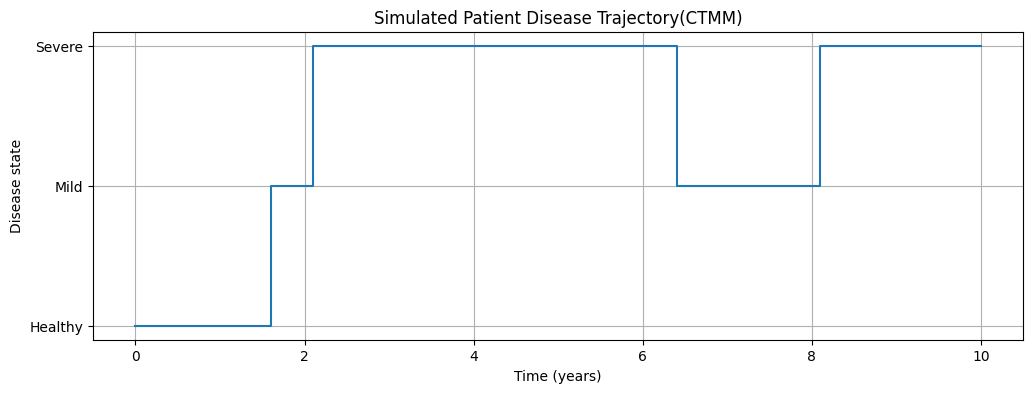

In [9]:
plt.figure (figsize = (12, 4))
plt.step(times, traj, where='post', label ='state')
plt.yticks (range(len(states)), states)
plt.xlabel ('Time (years)')
plt.ylabel('Disease state')
plt.title ('Simulated Patient Disease Trajectory(CTMM)')
plt.grid(True)
plt.show()


Next Steps and Extensions:

Try changing transition rates in Q to simulate faster/slower disease progression.

Fit CTMM parameters from real patient data using maximum likelihood or Bayesian methods.

Extend to time-dependent covariates or competing risks.

# References 

 - Jönsson et al. (2024). "Markov models in pharmacometrics." CPT: Pharmacometrics & Systems Pharmacology.
- Kalbfleisch & Lawless (1985). The analysis of panel data under a Markov assumption.
 - Jackson (2011). Multi-State Models for Panel Data: The msm package in R.

- Ooi QX, Plan E, Bergstrand M. A tutorial on pharmacometric Markov models. CPT Pharmacometrics Syst Pharmacol. 2025 Feb;14(2):197-216.